# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:


import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
   ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
hotel=pd.read_csv('INNHotelsGroup (3).csv')

In [ ]:
data= hotel.copy()

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [ ]:
data.shape

(36275, 19)



*   There are 36275 rows and 19 columns in the data.




#Checking the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   There are 5 columns which are of 'object type'; the rest are numerical columns.
*   The booking status column is our target variable and it is an object type.







# Checking for missing values

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64



*  There are no null values in the dataset.




# Dropping the duplicate values

In [ ]:
data.duplicated().sum()

0



*   There are no duplicate values in the data.




# Dropping the columns with all unique values

In [ ]:
data.Booking_ID.nunique()

36275



*   The booking ID column has all unique values, so we can drop it.




In [ ]:
data = data.drop(["Booking_ID"], axis=1)

# Statistical summary of the data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000




*   The numbers of Guests per stay ranges from 1 to 4, which is very common.
*   On an average, the number of weeknignts booked are 2 and no. of weekend nights booked are 1.
*  The lead time ranges from 0 to 443 days , with and average of 85 days.
*  The price per room ranges from 0 to 540 euros, with an average of 103.42 euros.





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Univariate Analysis

 **Arrival Month**

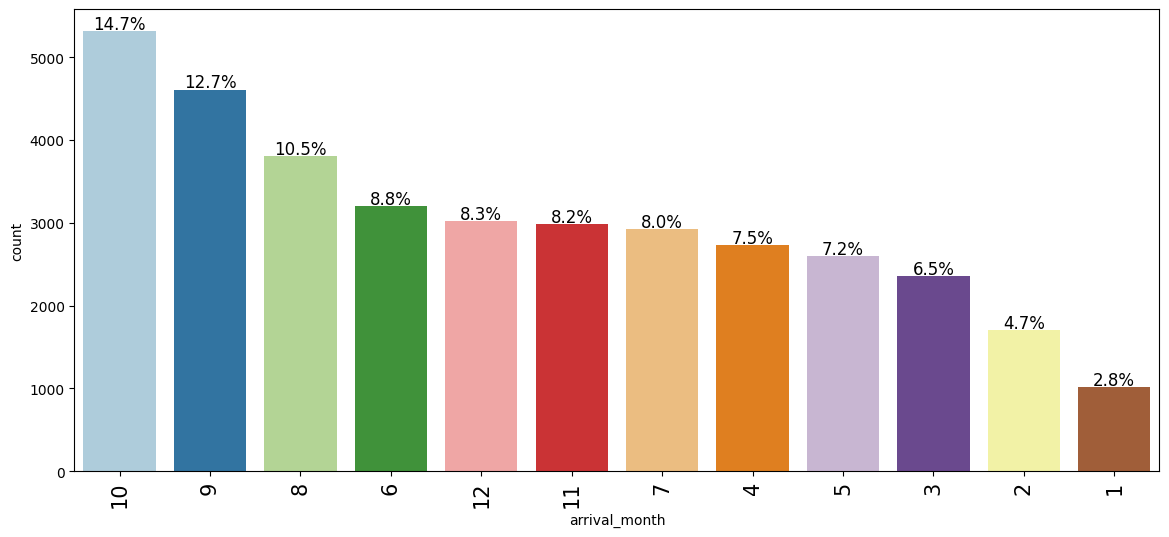

In [ ]:
labeled_barplot(data,'arrival_month', perc=True)



*   As we can see October monthe has the highest number of arrivals closely followed by September and August. It can be said that these are the busiest months at the hotels.




**market_segment_type**

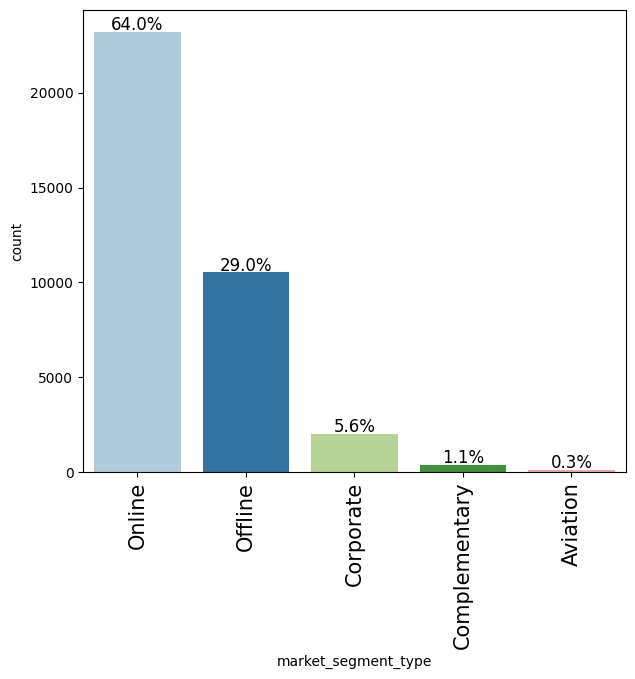

In [ ]:
labeled_barplot(data,'market_segment_type', perc=True)



*   As we can see most of the customers come from the 'online' market segment.




**no_of_adults**

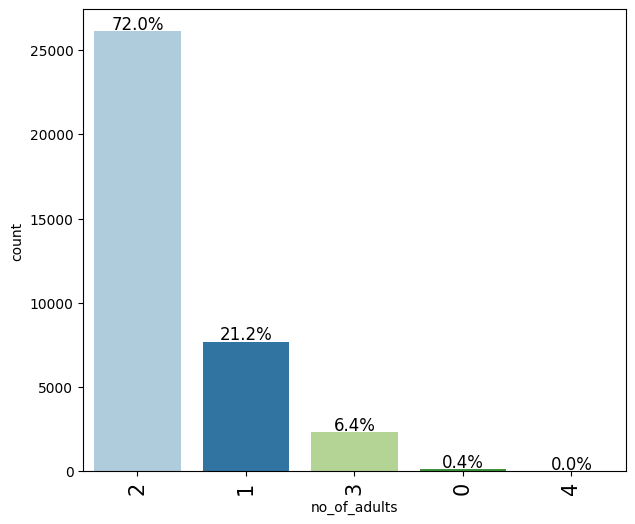

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)



*   As we can see most of the times the bookings are for 2 adult guests.




**no_of_children**

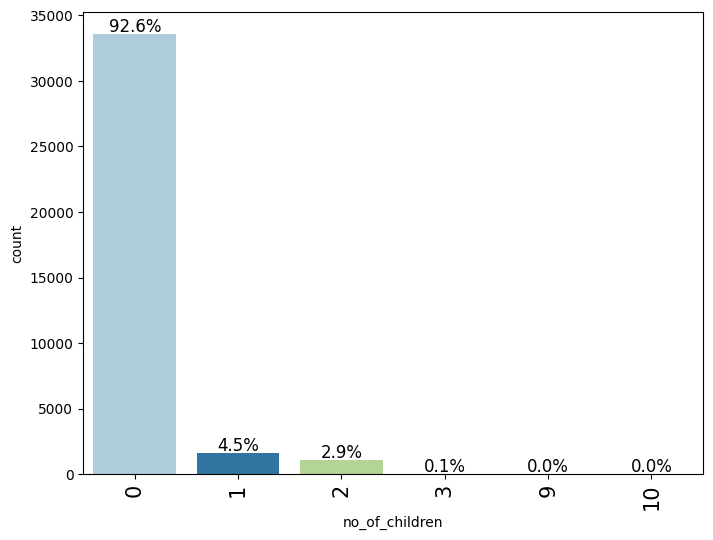

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)



*  Most of the times, the guests are not accompanied by children.




**no_of_weekend_nights **

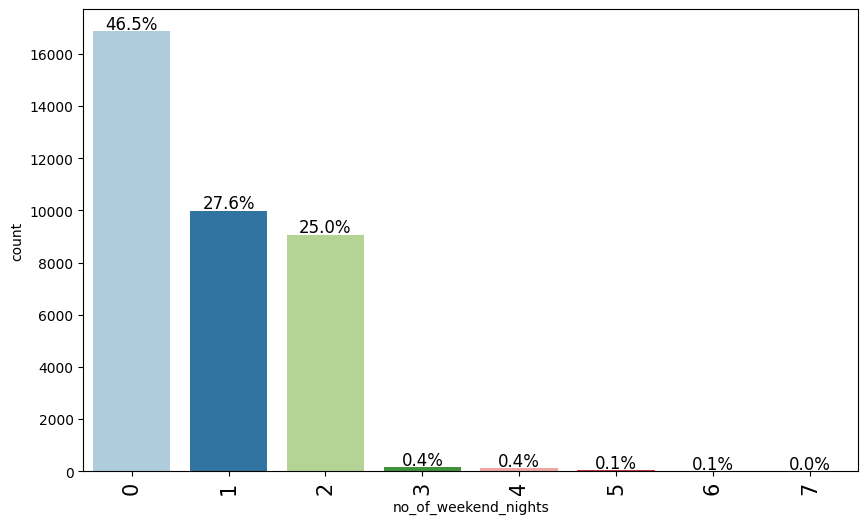

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)



*   As we can see almost 46.5% og guests bookings are for weekdays.
*   27.6% bookings are for one weekend night and 25% bookings are for 2 weekend nights.



**no_of_week_nights **

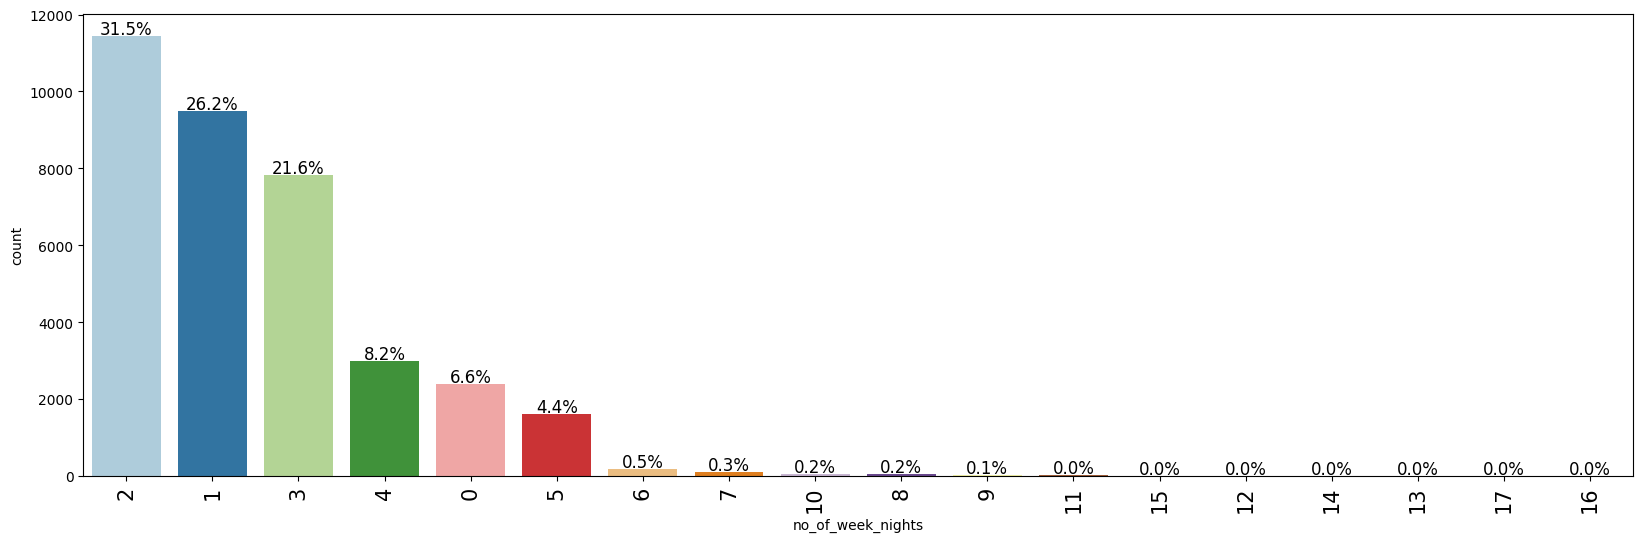

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)



*   Almost 31.5% of guests bookings are for two weeknights , followed by 26.2% for one weeknight and so on.




**type_of_meal_plan**

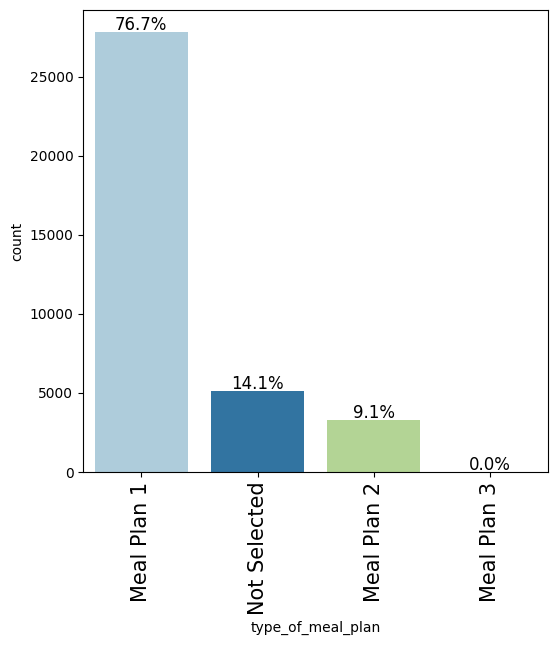

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True)



*  Majority of the guests choose meal plan 1 i.e Breakfast.
*   14.1% have not selected any Meal Plan and 9.1% have selected Meal Plan 2 i.e breakfast and one other meal.
*  Almost 0% of guests have selected Meal Plan 3 that includes breakfast, lunch and dinner; making it the least popular choice.





**required_car_parking_space**

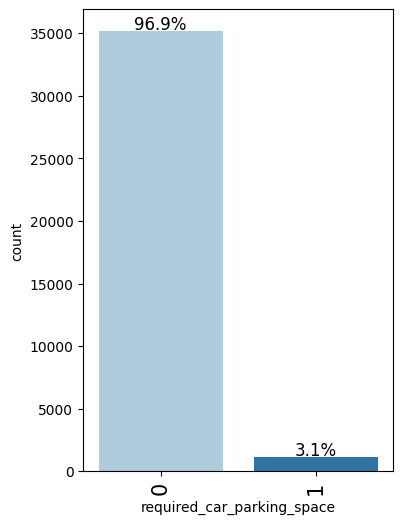

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)



* Majority of the guests do not require a car parking space.



**room_type_reserved**

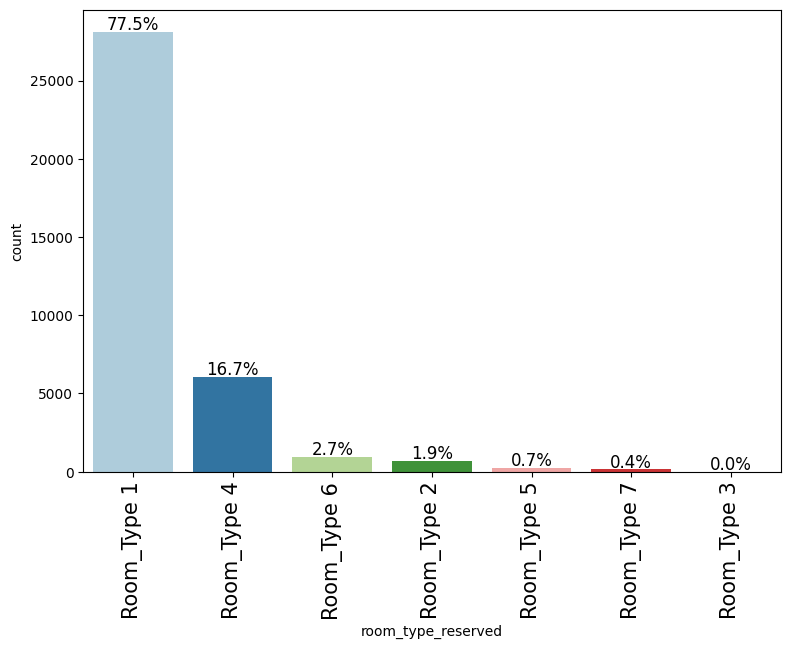

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)



*  Majority of the guests have booked Room Type 1
*   Room Type 4 have been booked by 16.7% of guests.



**lead_time**

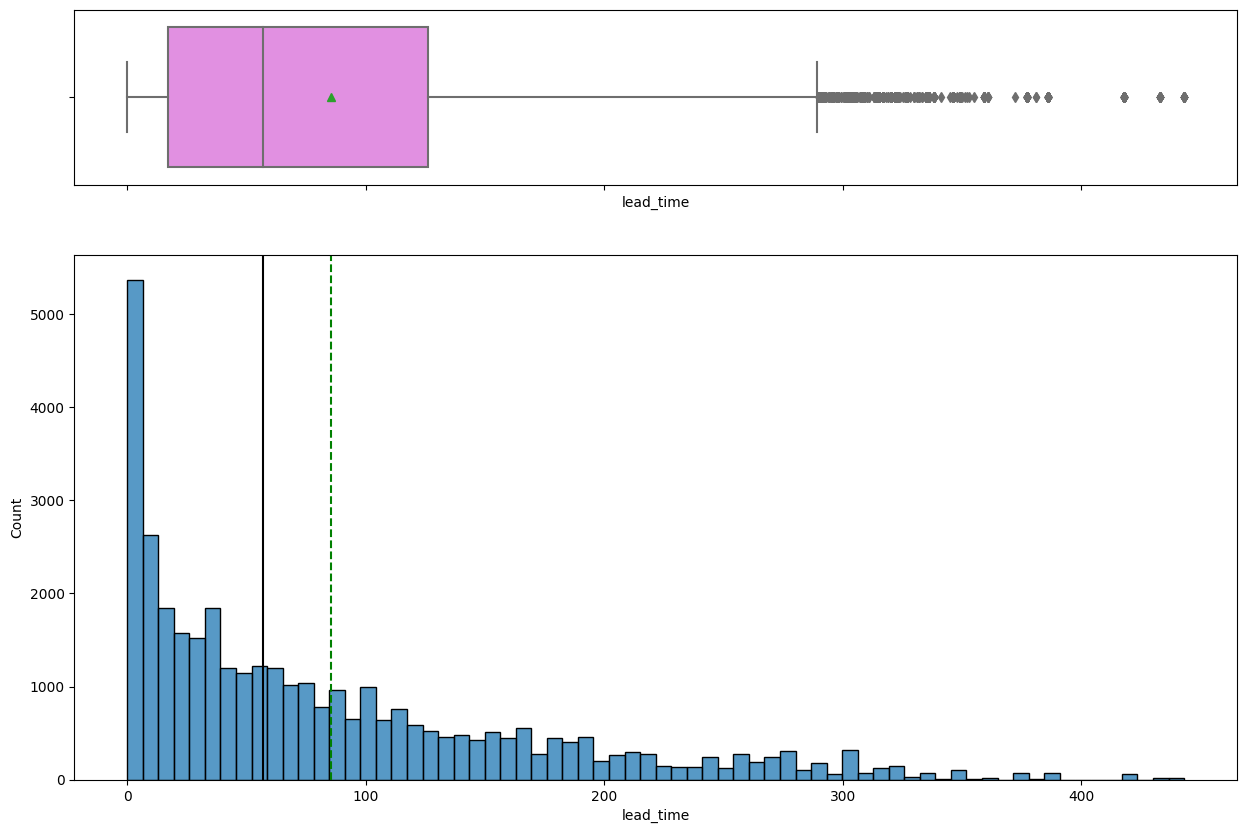

In [ ]:
histogram_boxplot(data, "lead_time")



*   It is a right skewed plot with many outliers on the left.
*   There is a huge uptick at 0, indicationg many bookings are made at the last minute where lead time is very less.



**repeated_guest**

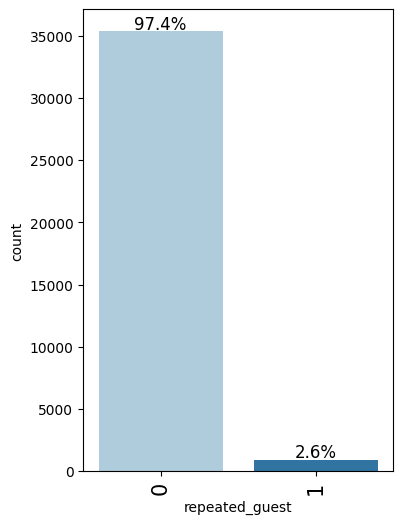

In [ ]:
labeled_barplot(data, "repeated_guest", perc=True)



*  The hotel has only 2.6% of repeated guests.




**no_of_previous_cancellations**

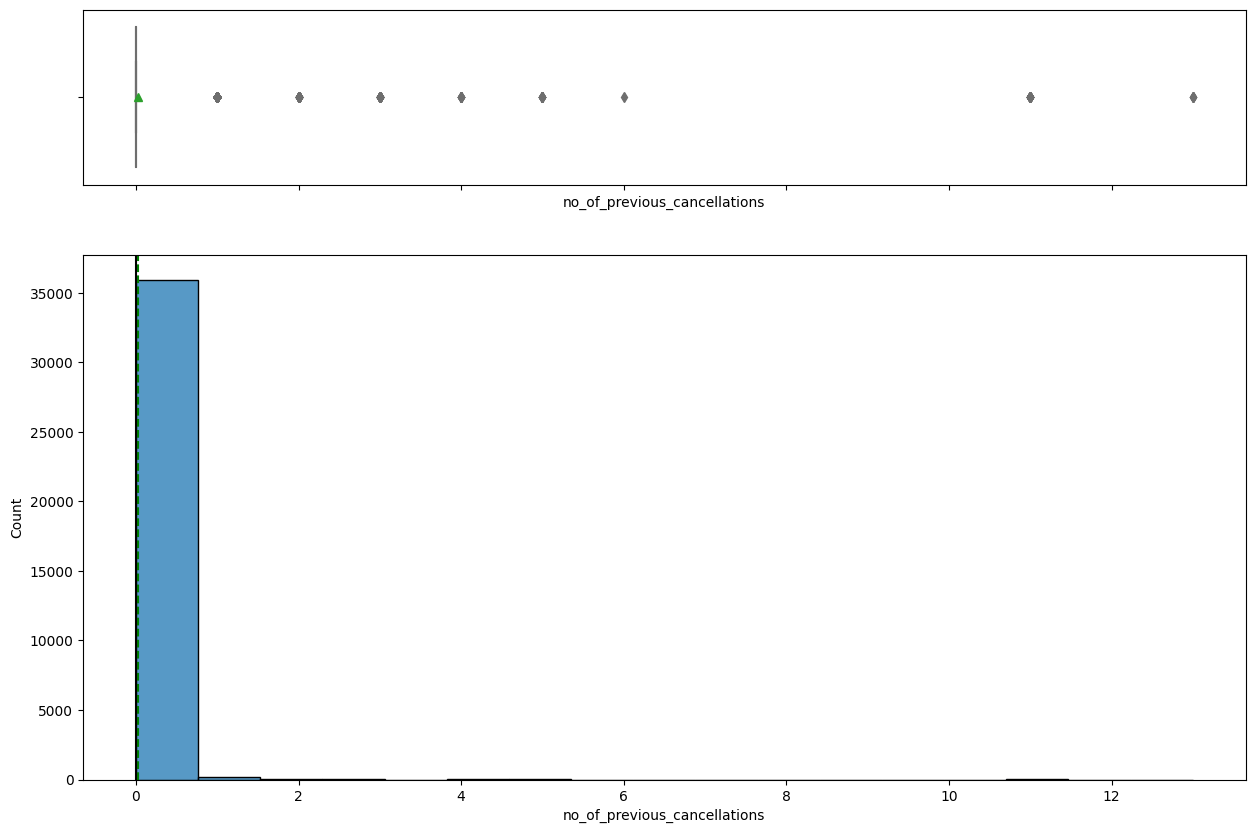

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")



*   Majority of the customers have no prior booking cancellation, before the current booking.




**no_of_previous_bookings_not_canceled**

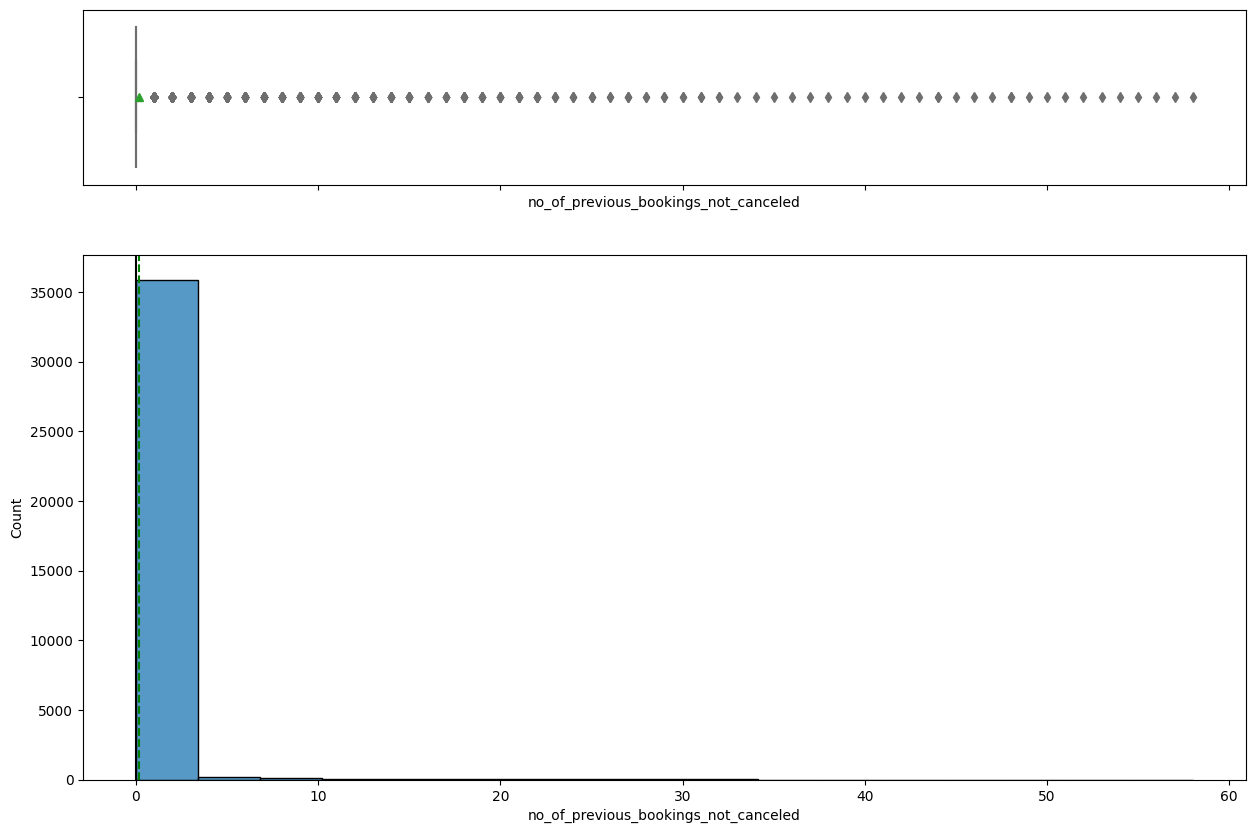

In [ ]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

**avg_price_per_room**

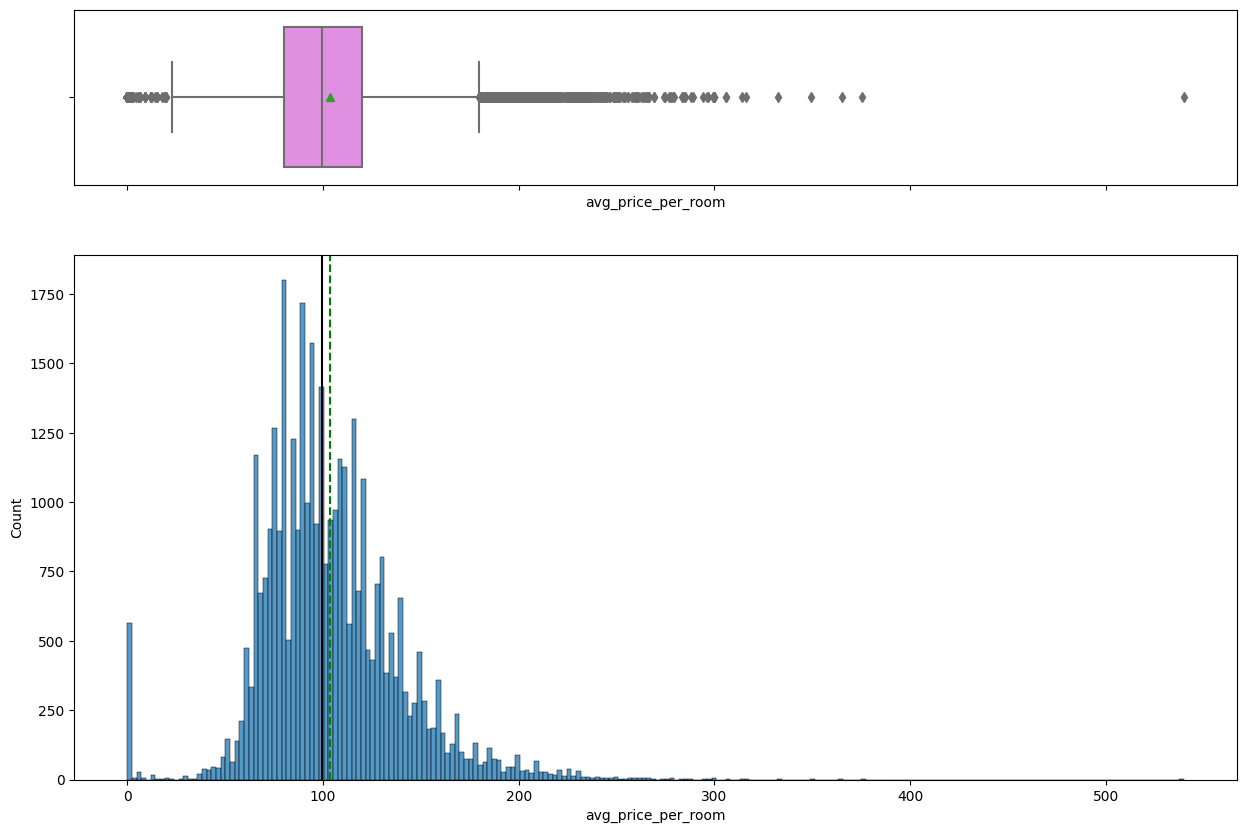

In [ ]:
histogram_boxplot(data,'avg_price_per_room')

In [ ]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [ ]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 =data["avg_price_per_room"].quantile(0.75)  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker



*   The graph is mostly normally distributed with ther being outliers on both sides.
*  The mean average room price is  close to 100 euros.



**no_of_special_requests**

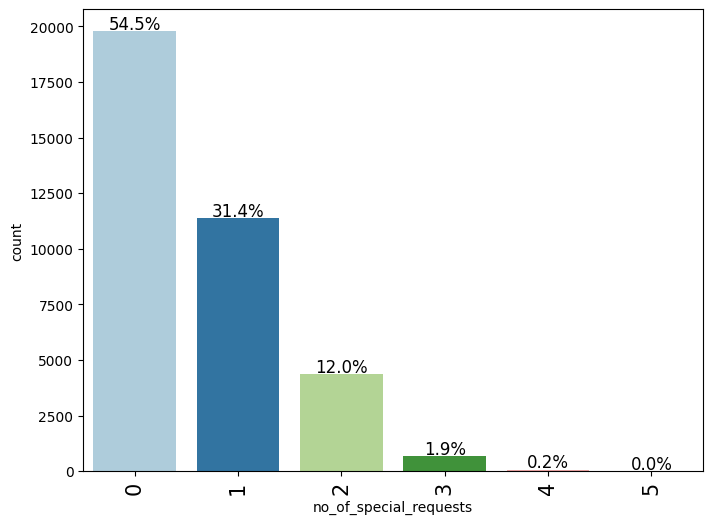

In [ ]:
labeled_barplot(data,'no_of_special_requests', perc=True)



*   54.5% of guests have no special requests, 31.4% of guests have one special requests and 12% of guests have 2 special requests.



**Booking status**

**Encoding canceled bookings to 1 and Not_canceled as 0 for further analysis**

In [ ]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

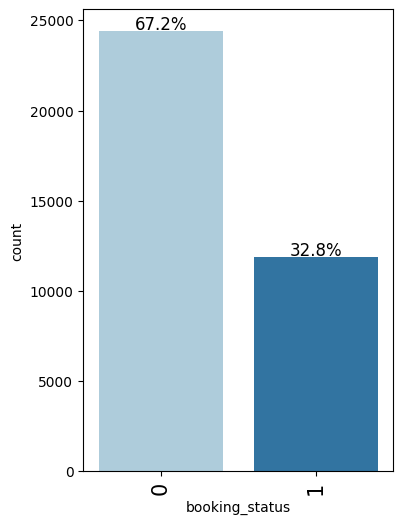

In [ ]:
labeled_barplot(data, "booking_status", perc=True)



*  62.7 perc of bookings are not canceled and 32.7 perc of bookings are canceled.




# Bivariate analysis

**Heatmap**

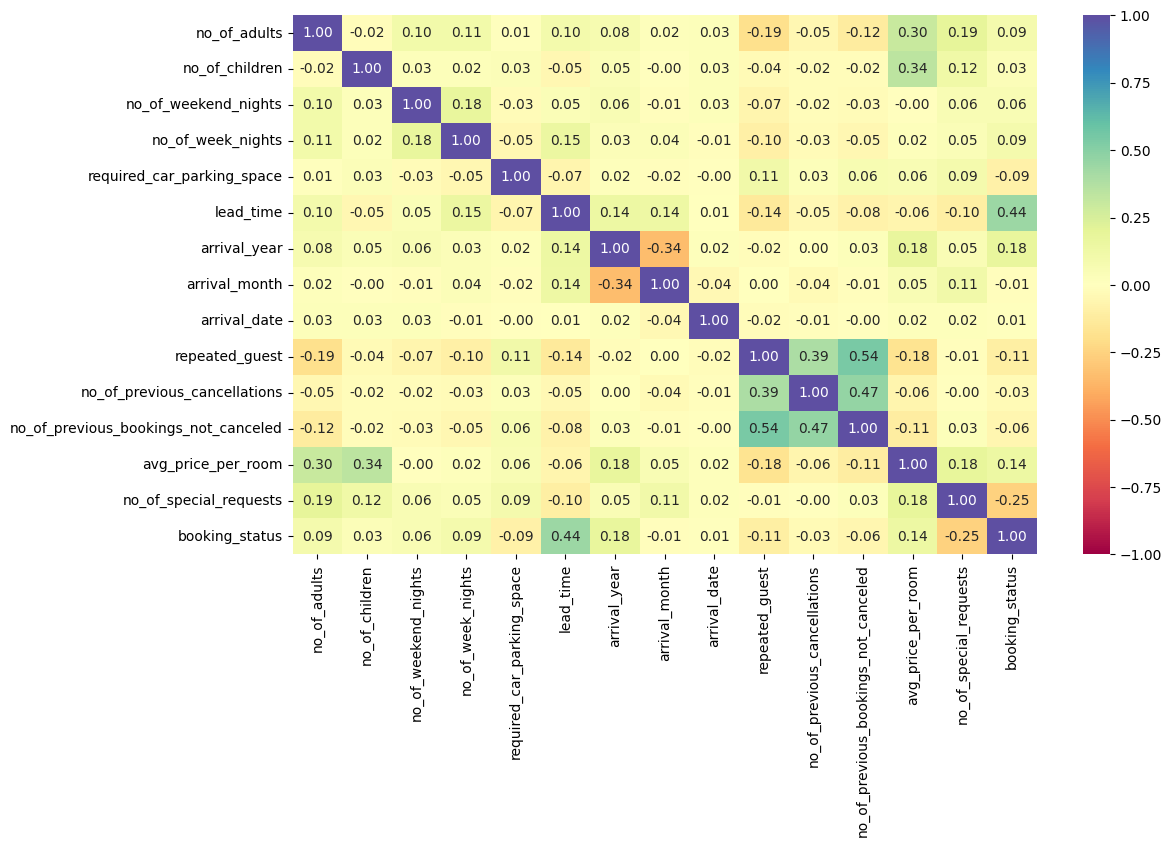

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   Most of the variables do not have a high relation with each other.
*  There is a positive coorelation between no_of_previous_bookinga_not cancelled and repeated guests.
*  There is also a relation between repaeted guests and number of bookings canceed.
*  the lead time and booking status are positively correlated.
*  The avg_room_price is positively correlated to the the no. of adults nd the no. of children indicating that the increase in number of guests will increase the price of the room.









**Relation between average price per room and market segment**

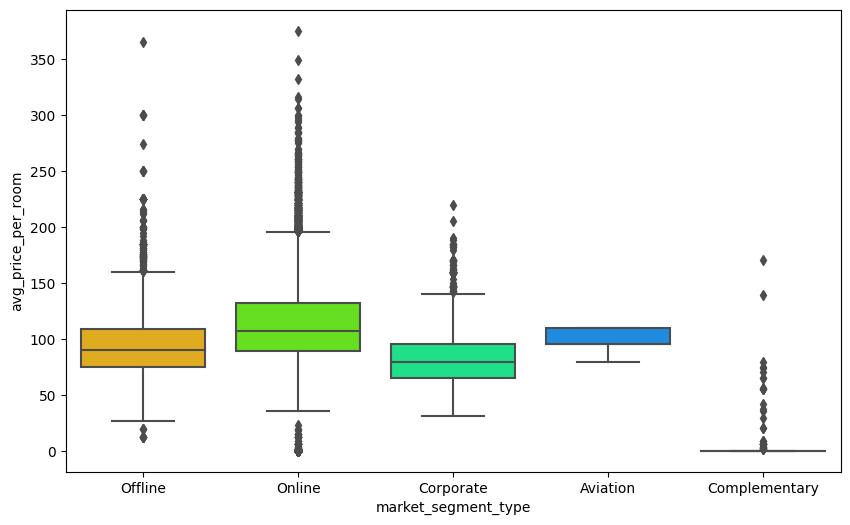

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()



*   The average price per room is highest in the online market segment followed closely by the offline and corporate segment.




**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


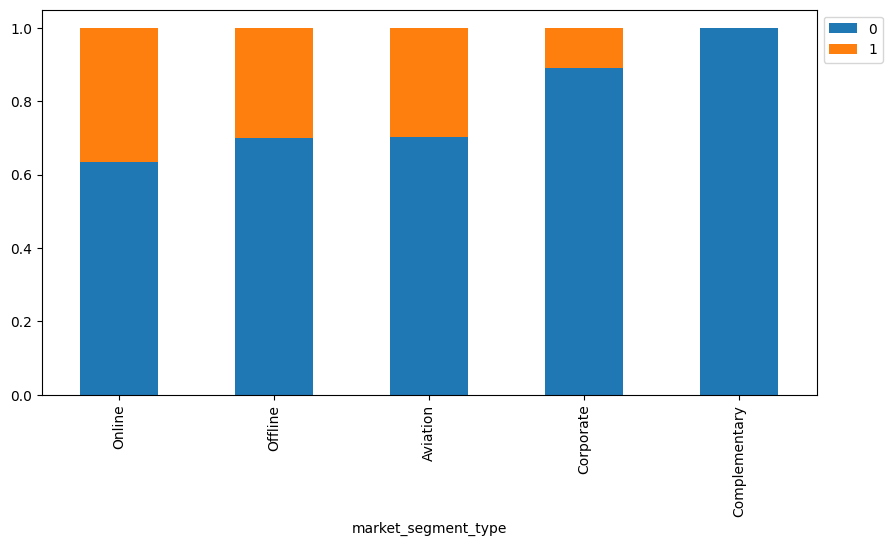

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")



*   The canceled bookings habe been encoded to 1 and not_canceled as 0.
*   Online booking segment ahs the most bookings and eventually the most cancellations. It is followed by the offline segment.
*   Corporate and aviation have the least cancellations.






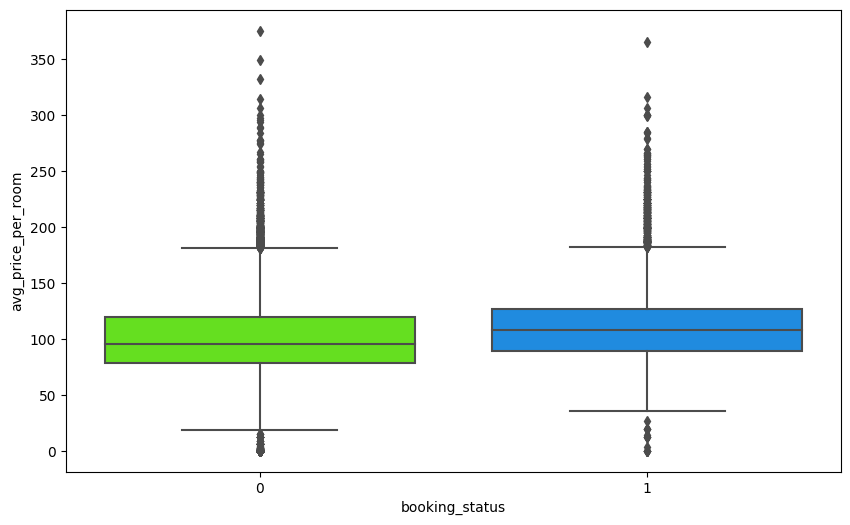

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()



*  The mean average price of the rooms which are canceled is slightly higher than the price of rooms which are not canceled.




**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


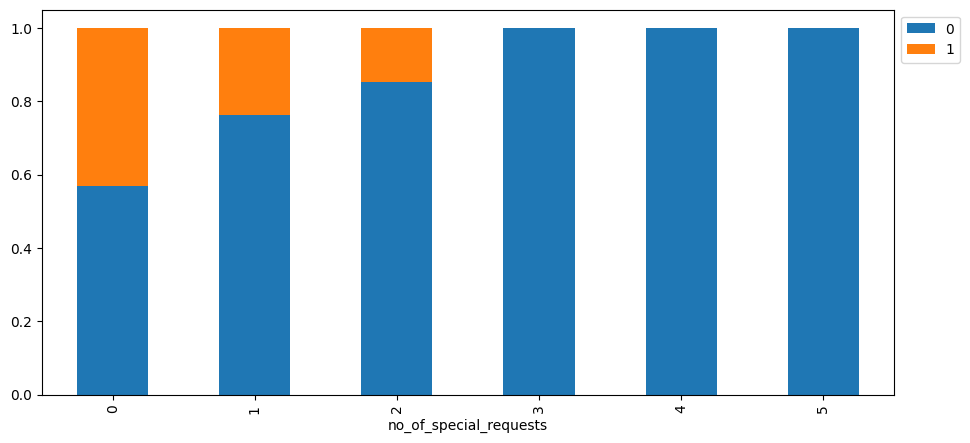

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")



*   As we can see as the number of special requests by the guests increases the cancellation reduces indicating customer loyalty towards the hotel.



**Let's see if the special requests made by the customers impacts the prices of a room**

<Axes: xlabel='no_of_special_requests', ylabel='avg_price_per_room'>

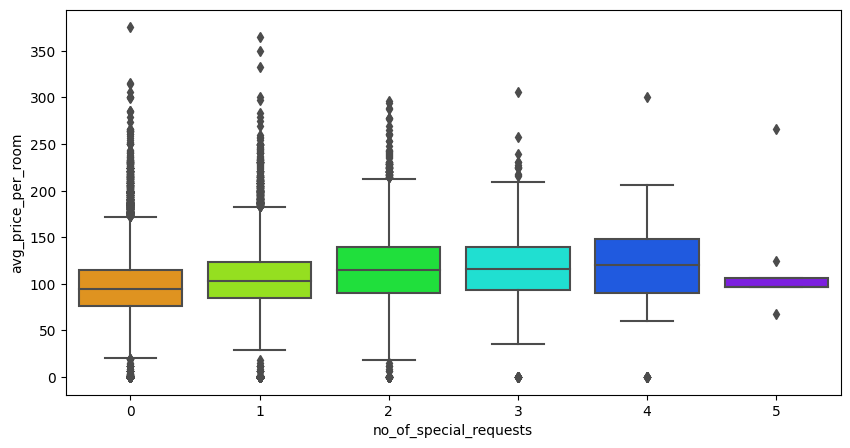

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)



*  The average price per room slightly increases withe the increase in special requests.




**Relation between booking status and the lead time**

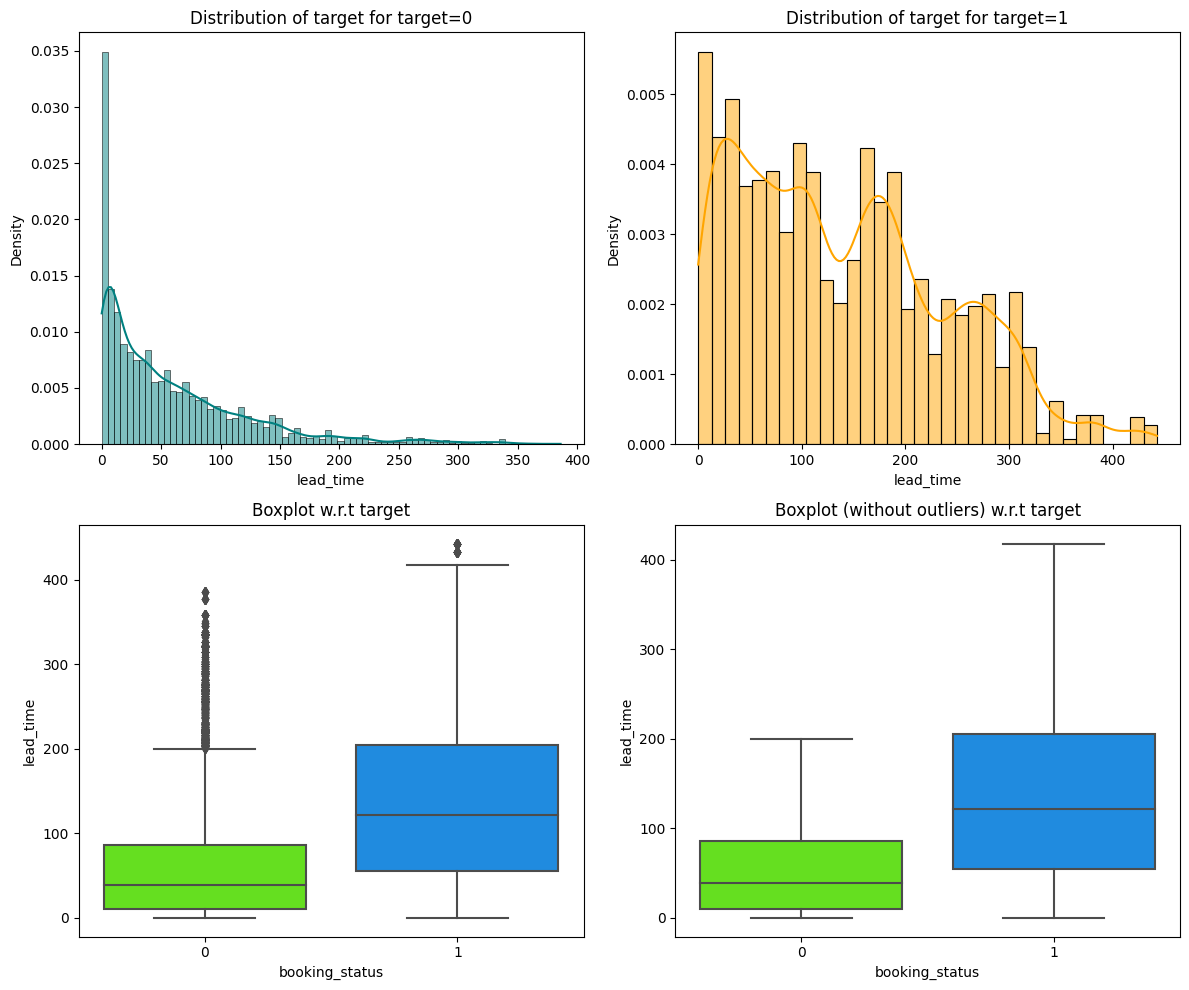

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")



*   As we can see lower the lead time , lower are the chances of booking cancelations.



**Relation between booking satus and no. of asdults and no. of children.**

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
9                   1      1      2
10                  1      0      1
------------------------------------------------------------------------------------------------------------------------


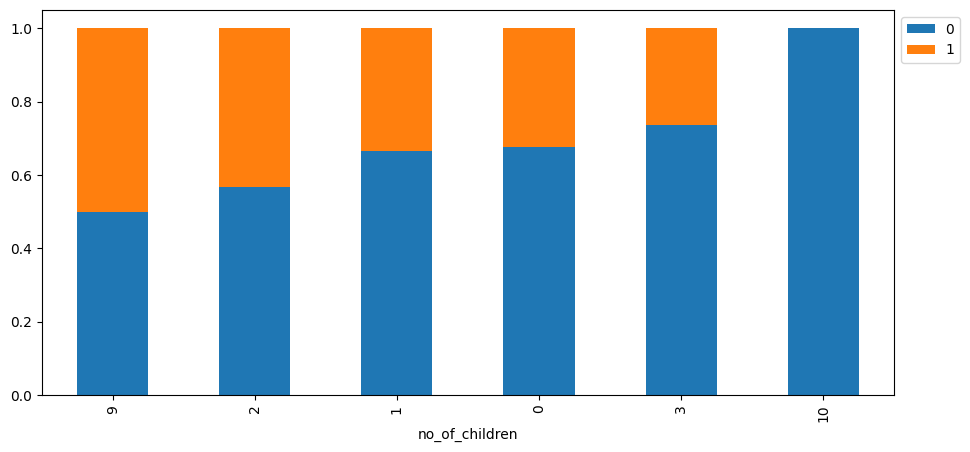

In [ ]:
stacked_barplot(data,"no_of_children","booking_status")



*  As the number of children in the guests bookings increases, the chances of cancellations decrease.




booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


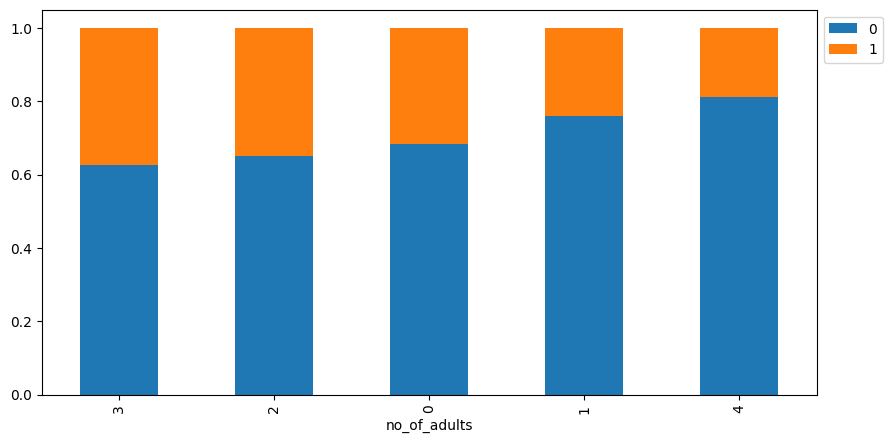

In [ ]:
stacked_barplot(data,"no_of_adults","booking_status")

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
0               23476  914  24390
1               11869   16  11885
------------------------------------------------------------------------------------------------------------------------


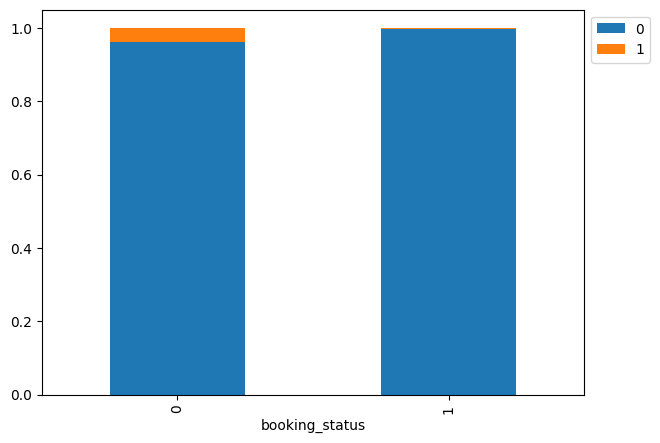

In [ ]:
stacked_barplot(data, "booking_status","repeated_guest")

**Let's check the percentage of bookings canceled in each month.**

arrival_month      1     2     3     4     5     6     7     8     9    10  \
booking_status                                                               
All             1014  1704  2358  2736  2598  3203  2920  3813  4611  5317   
0                990  1274  1658  1741  1650  1912  1606  2325  3073  3437   
1                 24   430   700   995   948  1291  1314  1488  1538  1880   

arrival_month     11    12    All  
booking_status                     
All             2980  3021  36275  
0               2105  2619  24390  
1                875   402  11885  
------------------------------------------------------------------------------------------------------------------------


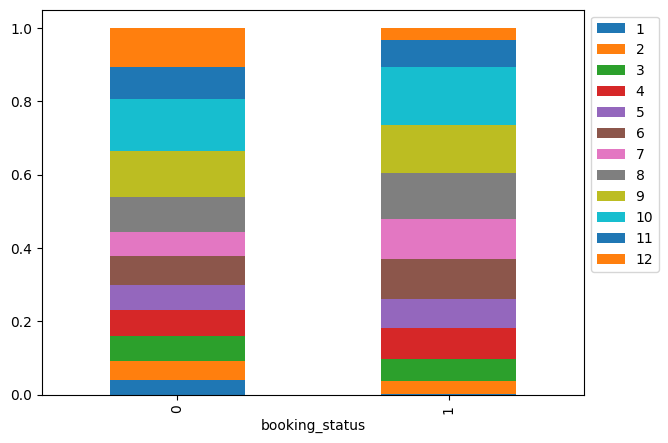

In [ ]:
stacked_barplot(data, "booking_status","arrival_month")



*   Of all the months, October floowed cosely by Sepetember and August has the highest number of cancellations.



**As hotel room prices are dynamic, Let's see how the prices vary across different months**

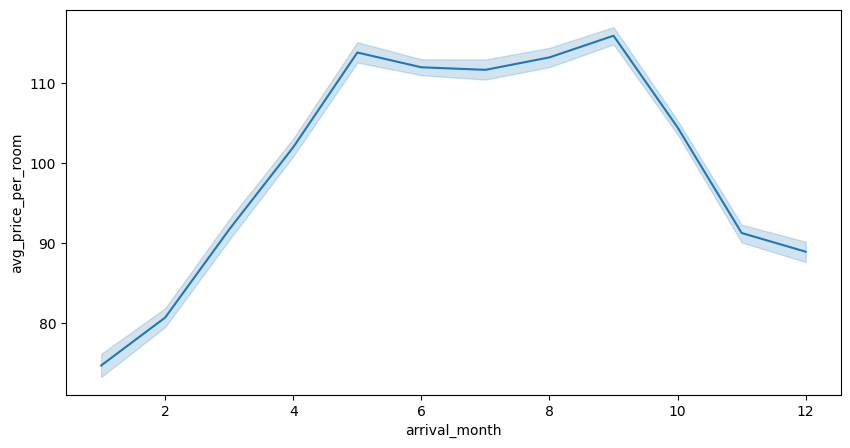

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room")
plt.show()



*   The average price per room is highest from April to September.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

# Outlier Check

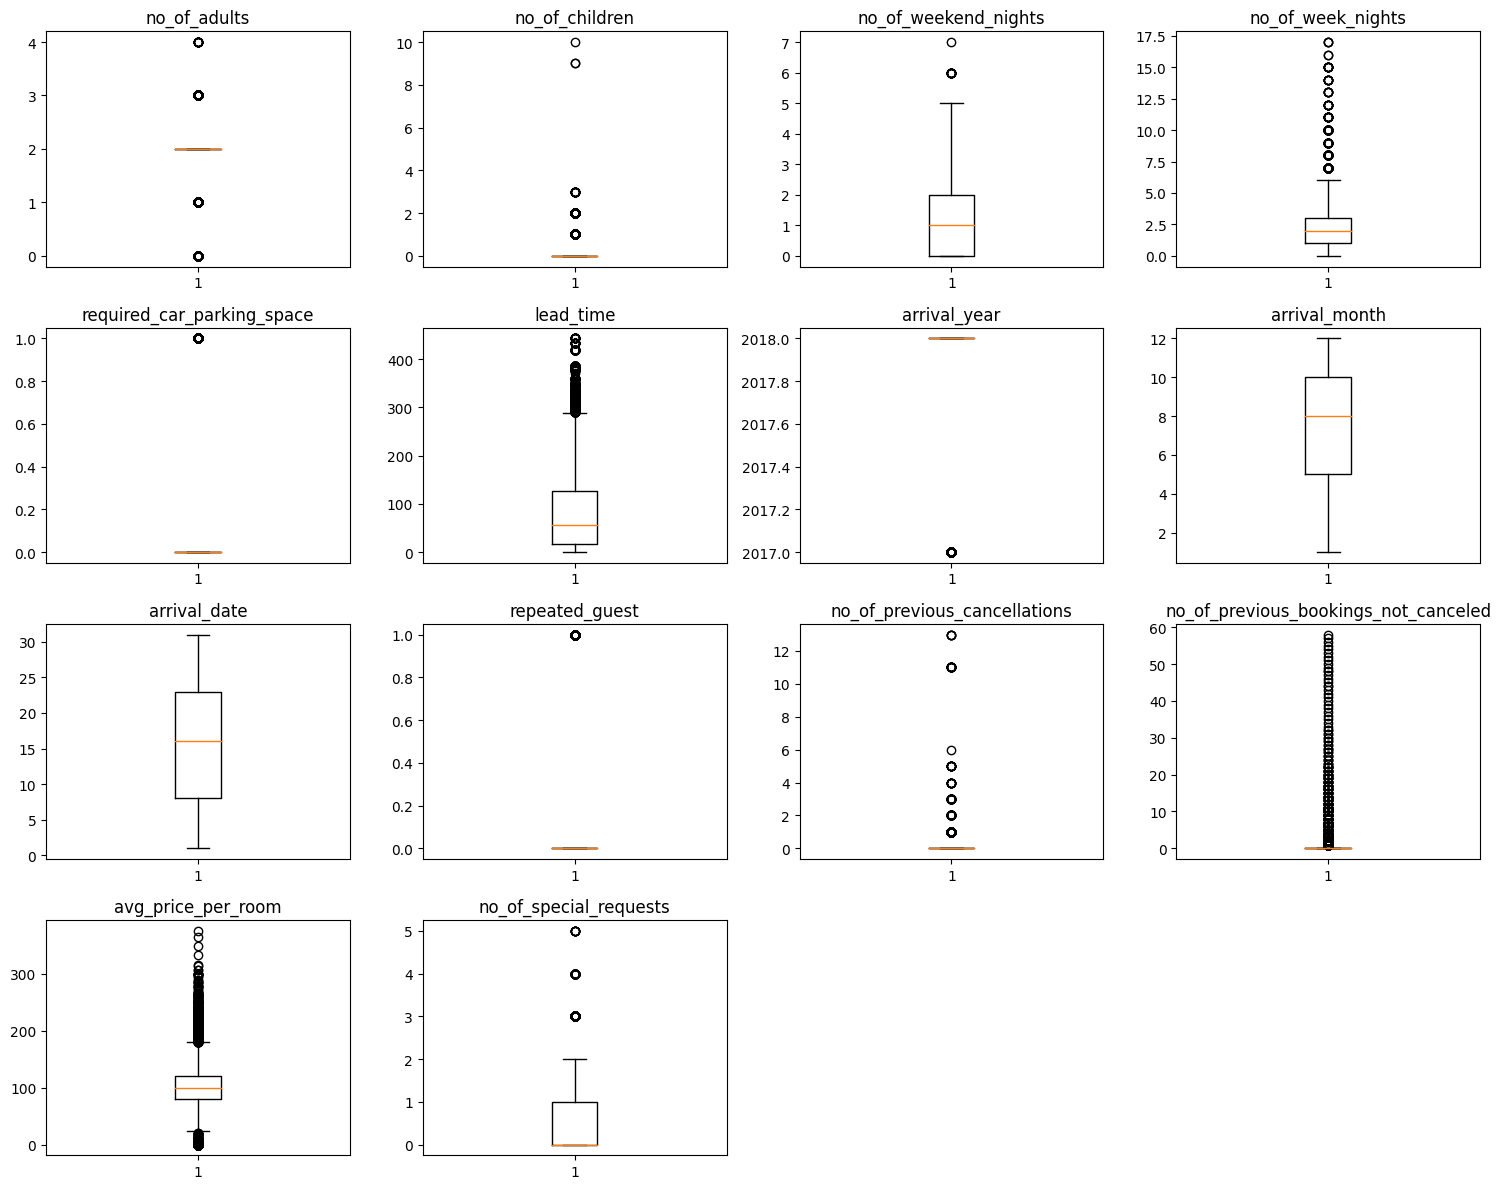

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are many graphs with outliers, we are not going to treat them as they can be real figures.




#Model Building
**Model evaluation criterion**
Model can make wrong predictions as:

*   Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
*  Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking
*  Which case is more important?
Both the cases are important as:

*   If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

*  If we predict that a booking will be canceled and the booking will not be canceled, the customer wont find another room in the hotel creating problems for the staff, further it may damage the reoutation of the hotel, deceasing its popularity and loyalty within consumers.

*   How to reduce the losses?
*   Hotel would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

*   First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.

*  The confusion_matrix_statsmodels function will be used to plot the confusion matrix.





In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model


*  We want to predict which bookings will be canceled.
*  Before we proceed to build a model, we'll have to encode categorical features






In [ ]:
# Let's split the data into train and test set
# specifying the independent  and dependent variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


# Model Building - Logistic Regression

*  We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.
*  Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.




In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.3292
Time:                        01:44:40   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      



*   Negative values of the coefficient show that the probability of booking not canceling decreases with the increase of the corresponding attribute value.
*  Positive values of the coefficient show that the probability of a booking not canceling increases with the increase of the corresponding attribute value.
*  p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.






## Model performance evaluation

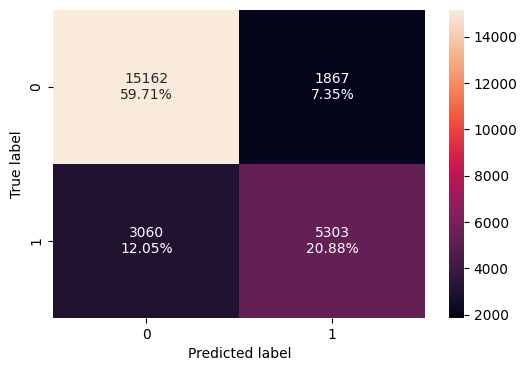

In [ ]:
#Confusion Matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80596,0.63410,0.73961,0.68280




*   The f1_score of the model is ~0.68 and we will try to maximize it further.
*   The variables used to build the model might contain multicollinearity, which will affect the p-values
*  We will have to remove multicollinearity from the data to get reliable coefficients and p-values






# Detecting and Dealing with Multicollinearity

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39491186.47744
1,no_of_adults,1.34849
2,no_of_children,1.97862
3,no_of_weekend_nights,1.06949
4,no_of_week_nights,1.09567
5,required_car_parking_space,1.03998
6,lead_time,1.39518
7,arrival_year,1.43167
8,arrival_month,1.27637
9,arrival_date,1.00674


# Dropping high p-value variables

*   We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
*  But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
*   Instead, we will do the following:
*   Build a model, check the p-values of the variables, and drop the column with the highest p-value.
*   Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
*   Repeat the above two steps till there are no columns with p-value > 0.05.










In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.3282
Time:                        01:44:46   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612      0.000   -1152.953    -680.776
no_of_adults                       0.1087      0.037      2.916      0.



*  Now no categorical feature has p-value greater than 0.05, so we'll consider the features in X_train1 as the final ones and lg1 as final model.




# Coefficient Interpretations

*  Coefficients for the number of adults, the lead time prior to a booking, the arrival year (i.e., 2018 v. 2017), the number of previous cancellations, the average room price, the total nights booked, selecting Meal Plan 2, and not selecting a meal plan are all positive, meaning an increase in these will lead to increase in chances of a hotel booking being cancelled.

*  Coefficients for requiring a parking space, arrival month, being a repeat guest, the number of special requests, and the market segments for Corporate and Offline are all negative, meaning an increase in these will lead to decrease in chances of a hotel booking being cancelled



# Converting coefficients to odds

*  The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
*  The percentage change in odds is given as odds = (exp(b) - 1) * 100




In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11487,1.16411,1.11466,1.04260,0.20298,1.01583,1.57291,0.95841,0.06484,1.25705,1.01937,0.22993,1.17855,1.33103,0.70069,0.75327,0.47893,0.38034,0.23840,0.45262,0.16771
Change_odd%,-100.00000,11.48701,16.41072,11.46616,4.25996,-79.70242,1.58342,57.29054,-4.15858,-93.51608,25.70460,1.93739,-77.00672,17.85489,33.10347,-29.93109,-24.67346,-52.10654,-61.96631,-76.15999,-54.73798,-83.22899


# Coefficient interpretations

*   repeated_guest: Holding all other features constant, a unit change in repeated_guest (i.e., a person booking the room being a repeated guest) decreases the odds that booking being canceled by 0.06 times or a 94% decrease in odds of a booking being canceled.
*  market_segment_type_Offline: Holding all other features constant, a unit change in market_segment_type_Offline (i.e., a booking originating from the Offline market segment) decreases the odds that booking being canceled by 0.17 times or an 83% decrease in odds of a booking being canceled.
*  A guest requiring a parking space decreases the odds of that booking being canceled by 0.20 times or an 80% decrease in odds of a booking being canceled.
*  A single additional euro increase in the average cost per night increases the odds of that booking being canceled by 1.02 times or a 2% increase in the odds of a booking being canceled.
*  A single additional night booked at the hotel increases the odds of that booking being canceled by 1.96 times or a 6% increase in the odds of a booking being canceled.








# Checking model performance on the training set

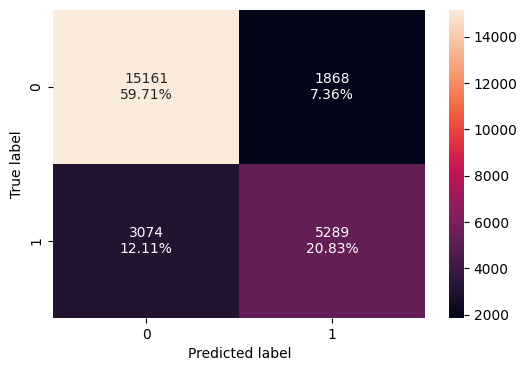

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80537,0.63243,0.73900,0.68157


# Test performance

In [ ]:
X_test1 = X_test[list(X_train1.columns)]

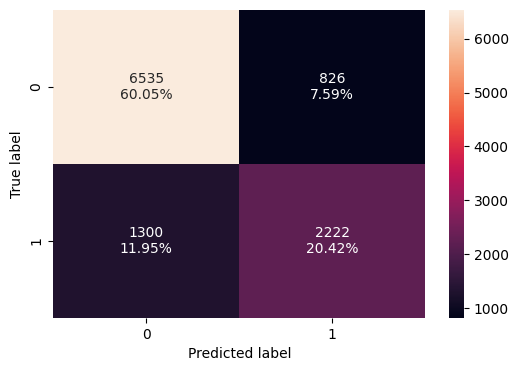

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641




*   The model is giving a f1_score of
 ~0.68 and ~0.67 on the train and test sets respectively
* As the train and test performances are comparable, the model is not overfitting
Moving forward we will try to improve the performance of the model



# Model Performance Improvement

*   Let's see if the f1_score can be improved further by changing the model threshold
*  First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
*   Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score






# ROC Curve and ROC-AUC

*   ROC-AUC on training set




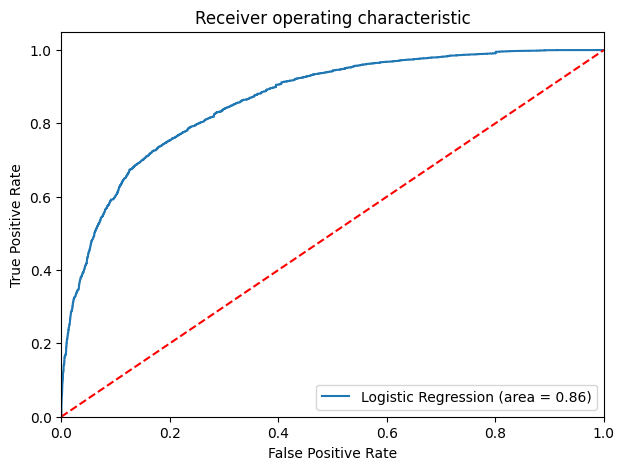

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()



*   Logistic Regression model is giving a good performance on training set.




# Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.369603791589294


**Checking model performance on training set**

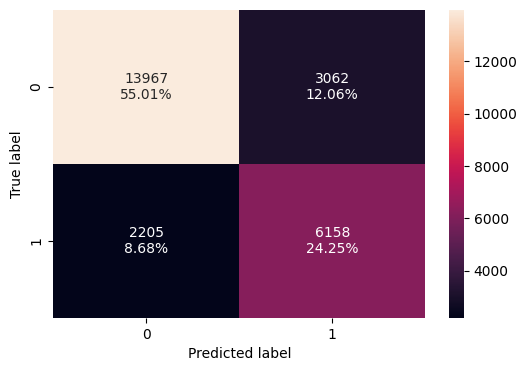

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79257,0.73634,0.66790,0.70045




*  The F1 scores have incresed but the precision scores have reduced.



**Let's check the performance on the test set**

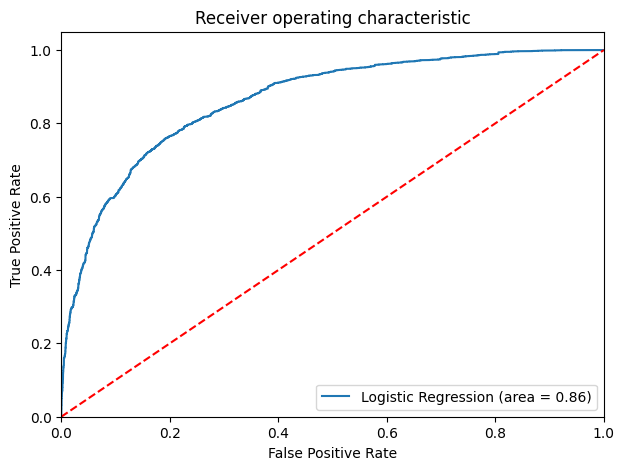

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

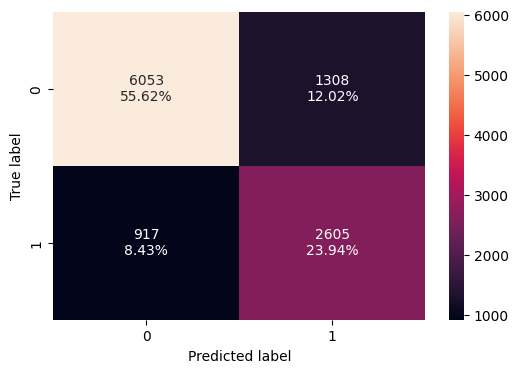

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


**Precision-Recall Curve to find a better threshold**

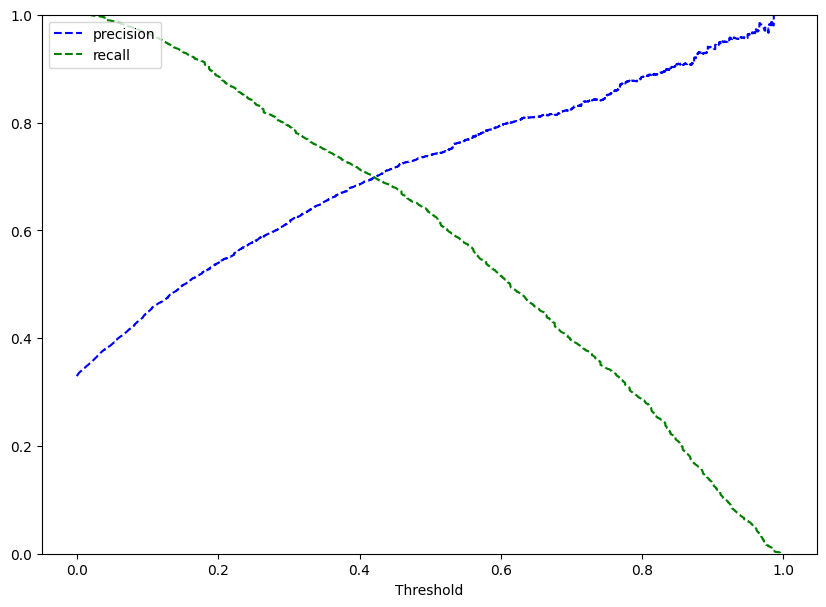

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

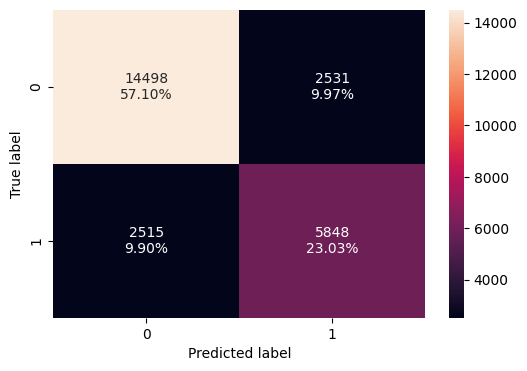

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69927,0.69794,0.69860




*   As we can see there is not much improvement in the scores.




**Let's check the performance on the test set**

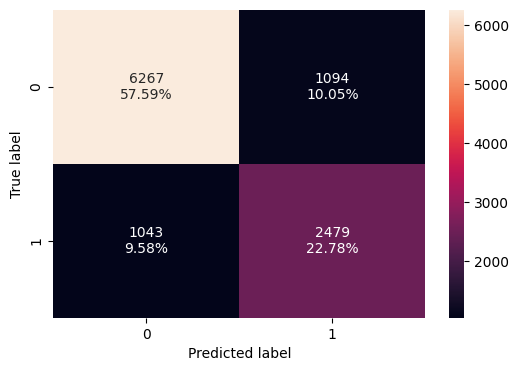

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80537,0.79257,0.80128
Recall,0.63243,0.73634,0.69927
Precision,0.73900,0.66790,0.69794
F1,0.68157,0.70045,0.69860


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80364
Recall,0.63089,0.73964,0.70386
Precision,0.72900,0.66573,0.69381
F1,0.67641,0.70074,0.69880


## Final Model Summary



*   Almost all the three models are performing well on both training and test data without the problem of overfitting
*   The model with a optimal threshold (0.37) is giving the best F1 score. Therefore it can be selected as the final model



## Building a Decision Tree model

**Data Preparation for Modeling**

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64




*  We had seen that around 67 % of observations belongs to class 0 (not canceled) and 32 % observations belongs to class 1 (Canceled), and this is preserved in the train and test sets




**Model Building**

**Decision Tree (default)**

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Model evaluation criterion**

*  Model can make wrong predictions as:
*  Predicting a booking will not be canceled but in reality, the booking will cancel (FN)
* Predicting a booking will cancel but in reality, the booking will not cancel(FP)  





**Which case is more important?**

* If we predict that the booking will not be canceled but the booking is canceled, it will be a revenue loss for the hotels as the room might not be sold.
* If we predict that the booking will be canceled but it is not canceled than the staff and employees will have to face the burden of extra work which was not scheduled previously. THus they may be required to be paid for extra shifts.


**How to reduce the losses?*
*   The company would want to predict which bookings are cancelled we will be focusing on the F1 scores




In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

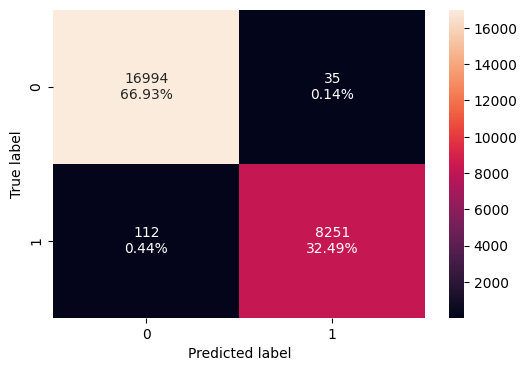

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


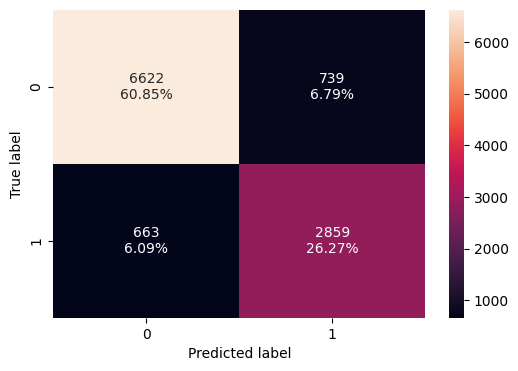

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


**Decision Tree (with class_weights)**

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

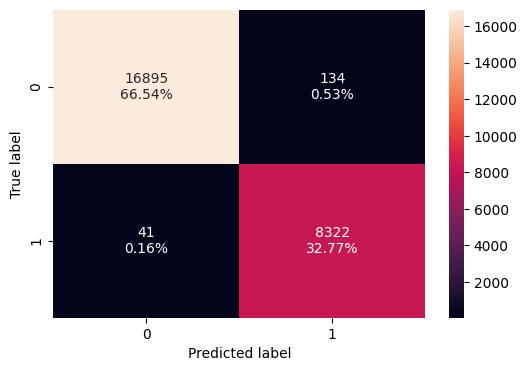

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99311,0.99510,0.98415,0.98960


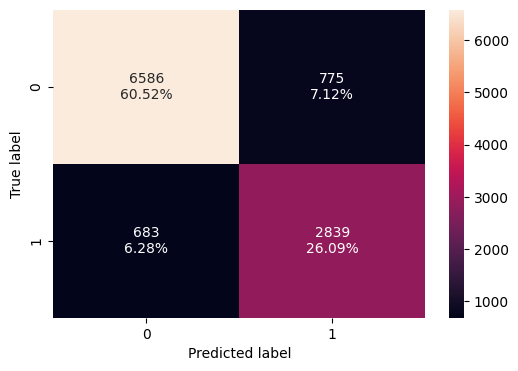

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86603,0.80608,0.78556,0.79568


**Observations**

*  As we can see both the models are performing extremely well on training sets.
*  There is a huge disparity between the performance on training set and testing set.
*   The models are overfitting.






**Let's use pruning techniques to try and reduce overfitting.**

**Decision Tree (Pre-pruning)**
**Using GridSearch for Hyperparameter tuning of our tree model**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

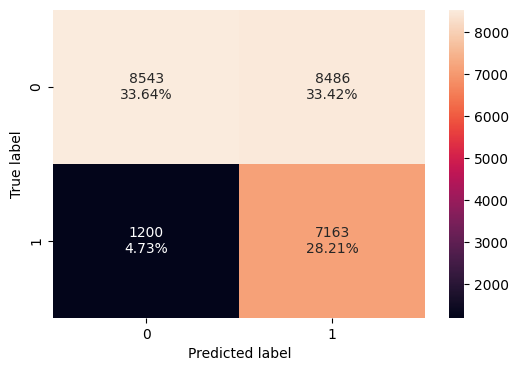

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.61854,0.85651,0.45773,0.59662


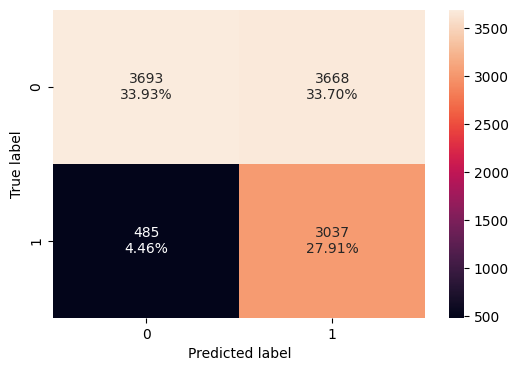

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.61840,0.86229,0.45295,0.59392




*   The model is giving a generalized result now since the f1 scores on both the train and test data are coming to be around 0.59 which shows that the model is able to generalize well on unseen data.


In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

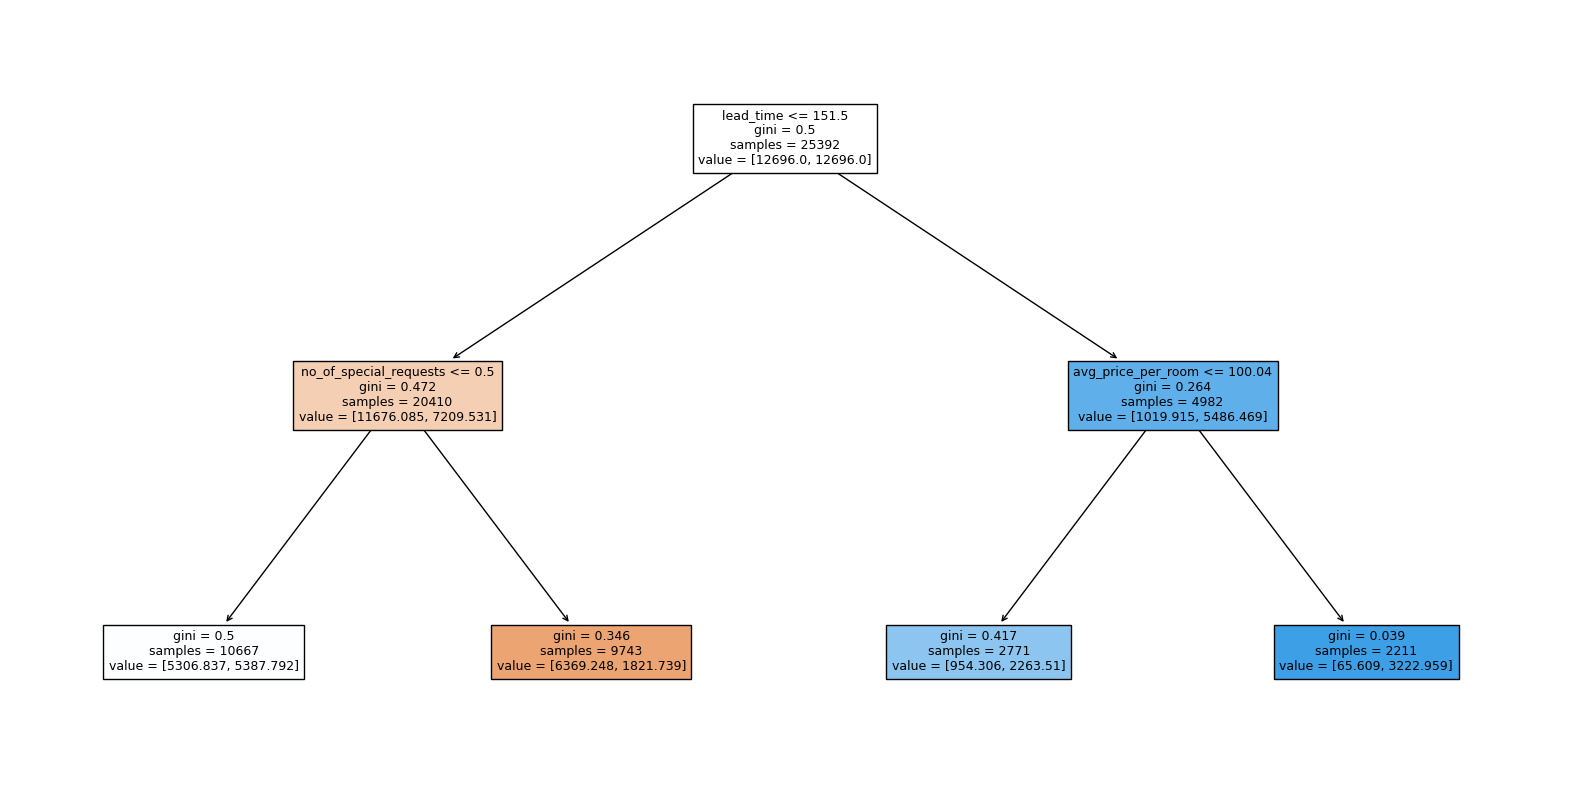

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

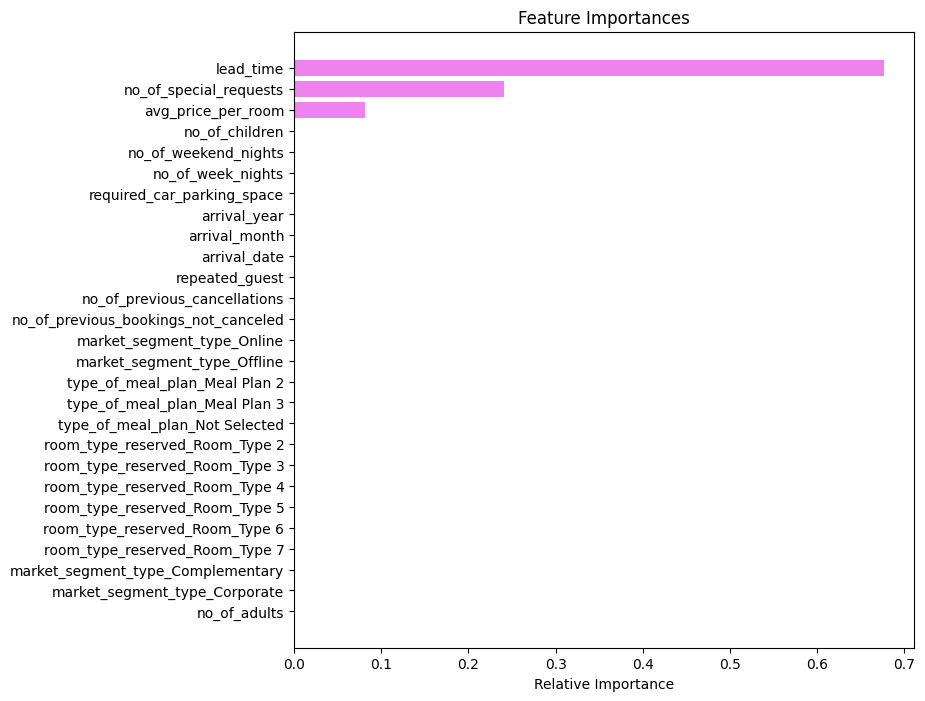

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   Lead time, no. of special requests and average price of the room are the most important features which influence the booking status of the room.
*   For Lead time less than 151 days if there are are more than one special requests, it is more likely that the booking will not be cancelled.
*   For Lead time more than 151 days, if the average room price is more than 100 euros it is highly likely that the booking will be canceled.






 **Decision Tree (Post pruning)**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1853,0.00890,0.32806
1854,0.00980,0.33786
1855,0.01272,0.35058
1856,0.03412,0.41882


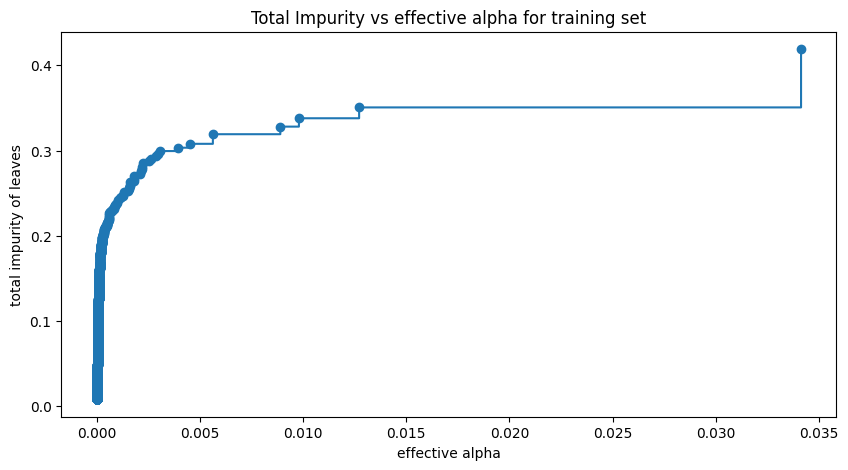

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.


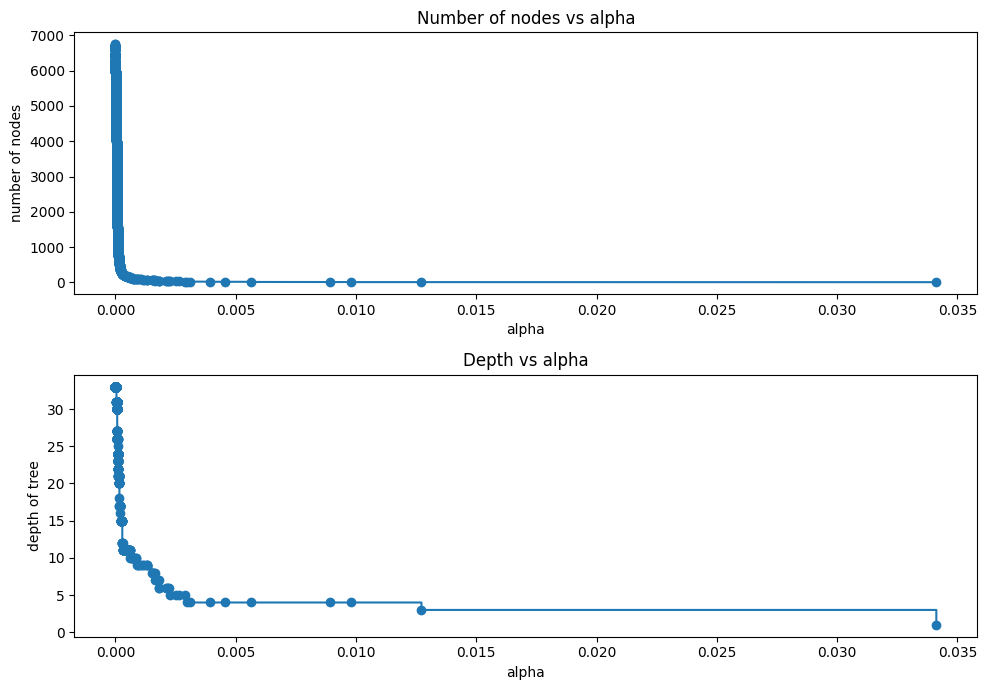

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**F1 Score vs alpha for training and testing sets**

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

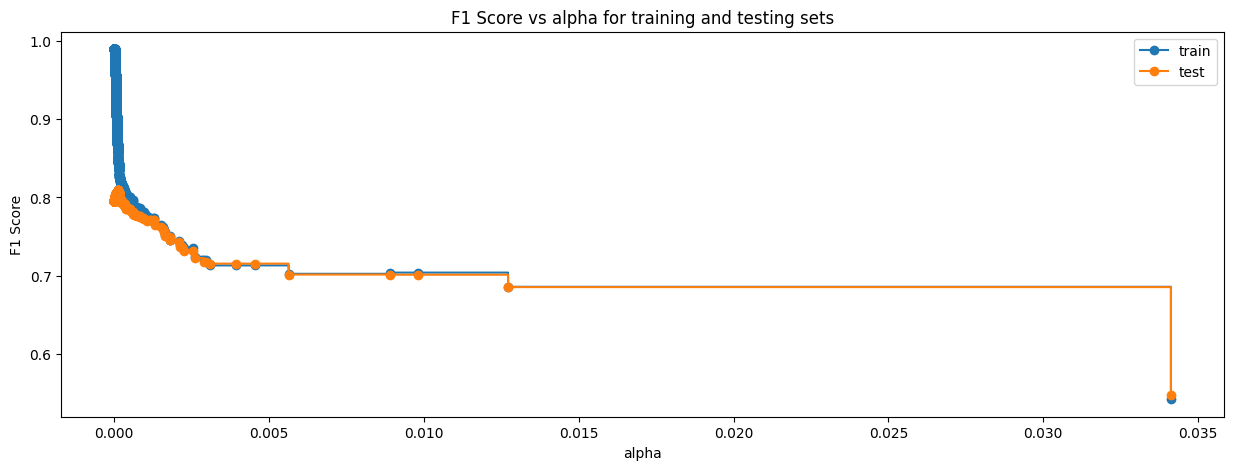

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


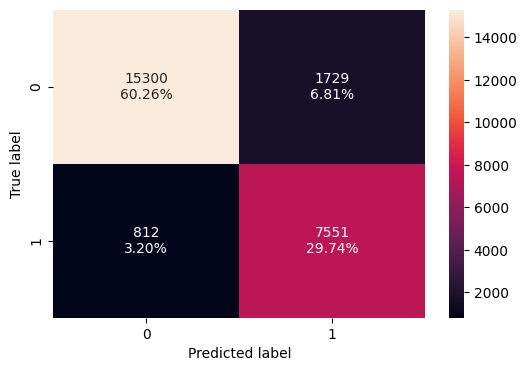

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89993,0.90291,0.81369,0.85598


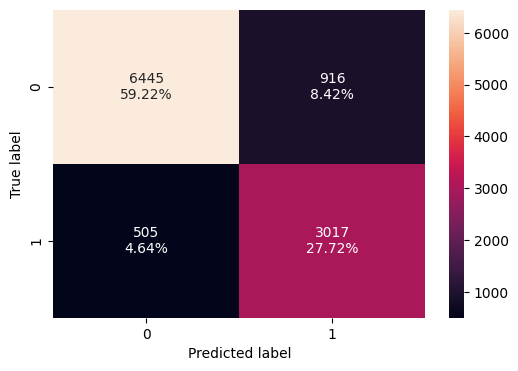

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86943,0.85662,0.76710,0.80939




*  In the post-pruned tree also, the model is giving a generalized result since theF1 scores on both the train and test data are coming to be around O.85 AND 0.80 which shows that the model is able to generalize well on unseen data.




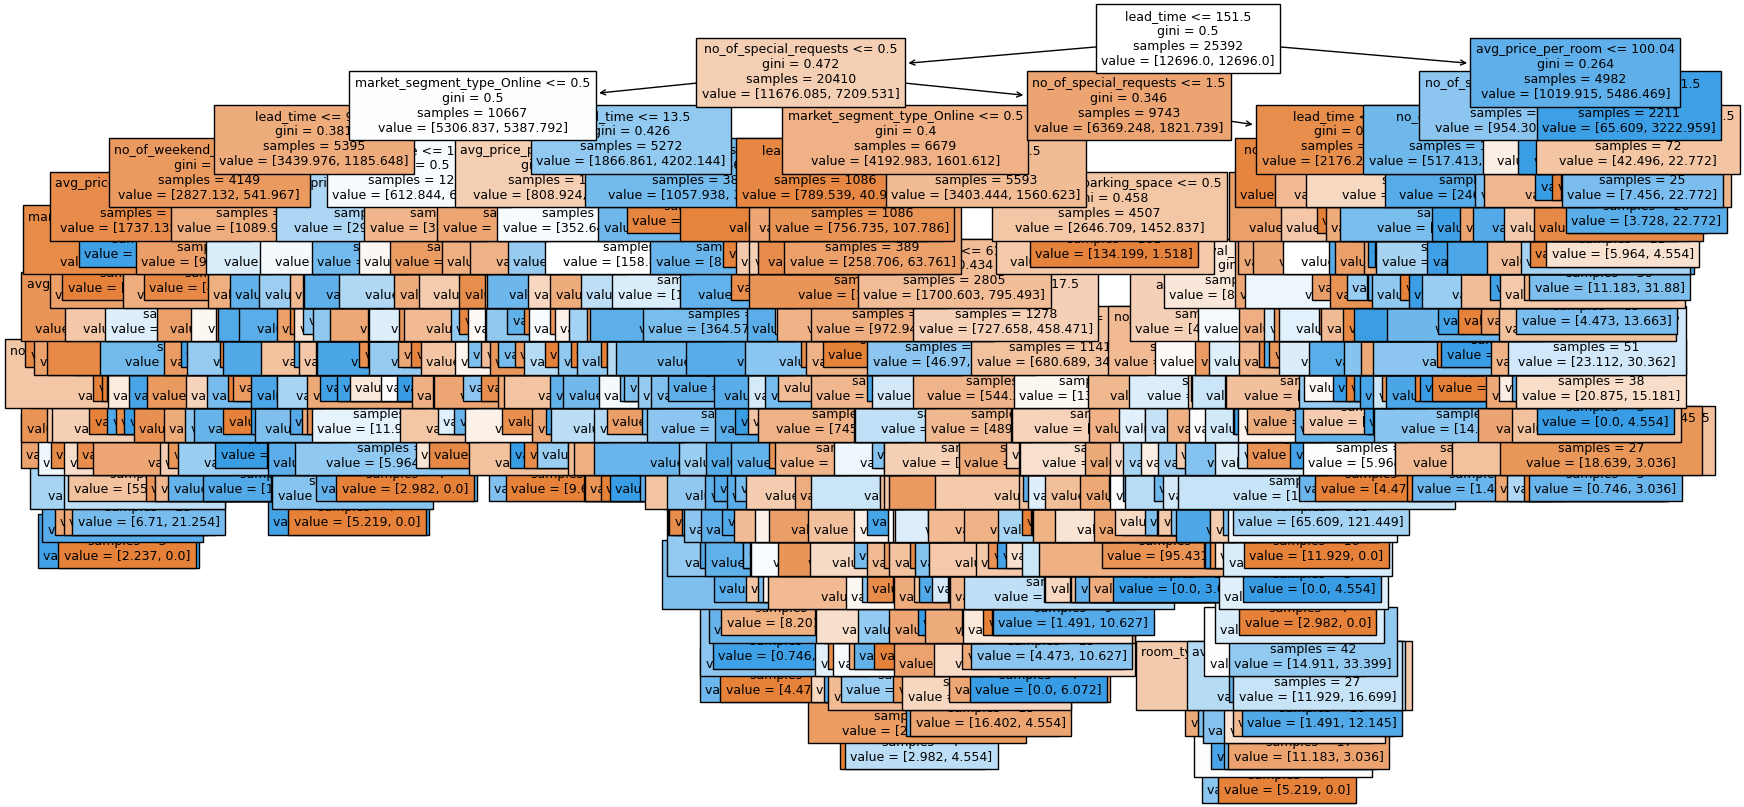

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

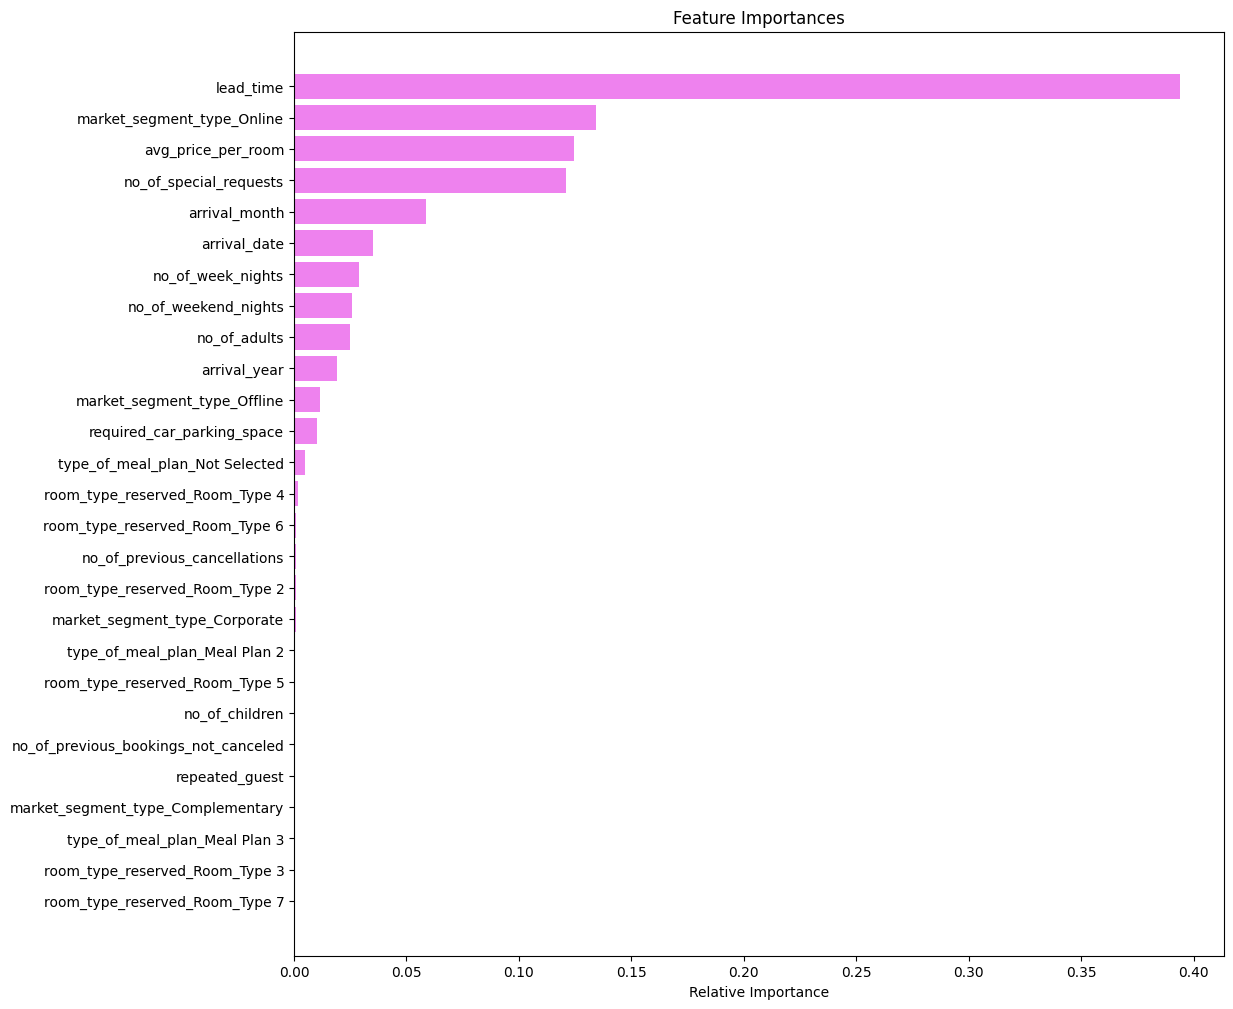

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations **

*  In the post prune tree also the lead time, market segment online, no. of soecial request play an important role in influencing the booking status of a room.




## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99311,0.61854,0.89993
Recall,0.99510,0.85651,0.90291
Precision,0.98415,0.45773,0.81369
F1,0.98960,0.59662,0.85598


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.86603,0.61840,0.86943
Recall,0.81175,0.80608,0.86229,0.85662
Precision,0.79461,0.78556,0.45295,0.76710
F1,0.80309,0.79568,0.59392,0.80939




*  Since the Post pruned model has better F1 scores we will be choosing that model.



## Actionable Insights and Recommendations





*   As per the decision Trees, the lead time has the most influence on the booking status, lower the lead time lower is the rate of cancellations.
* The hotels can look into awarding the guests with some extra perks for last minute bookings, which will increase the profitability.
*   Also applying a fee for cancellation just before the arrival date will help in reducing the cancellations.
*  Refund can be availbale for those who cancel within 24 hours of the booking, making it easier for the staff to calculate actual bookings.
*   As the average price of the room increases the possibility of booking cancelation also increases, the price calculations need to be studied further to decide an optimal price of the rooms.
*  As the number of special requests made by Guests increases, the possibility of room cancellation decreases, the hotel can look into providing extra facilities and provisions which will increase the profitability.
*  Major part of the hotels' bookings are through the online market segment, it is adviable to increase marketing in this segment.
* Also the corporate segment has the least amount of cancellations, the hotel can look into making partenship with various corporations to host their events at the hotel and can also provide loyalty discount to employees of these corporations.
*  The hotel can look into offeringa rewards program for repaeted customers which will incease its popularity and loyalty anong consumers.









